# imports

In [1]:
# system & general:
from os import listdir, mkdir, makedirs
from os.path import isfile, join, isdir, exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr, fisher_exact, mannwhitneyu, sem
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
# mpl.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.TCR_feature_generation.SequenceClusteringModule import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *
from ShaniBA.CardioProject.Figures.Figure1 import *

#ML:
from sklearn.linear_model import LogisticRegression, LinearRegression


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Definitions

In [62]:
#####path definitions:
MyPath = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530', 'rb') as fp:
    PNP530 = pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126', 'rb') as fp:
    Cardio126 = pickle.load(fp)
PNP530Cardio126 = PNP530 + Cardio126

FIG2_DIR = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_april19/\
Fig2_ver2/'
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
FEATURES_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/'
SAMPLE_LIST_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/'
CARDIO_PHEN_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/'
CLUSTER_ANALYSIS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'

##### general definitions:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=4, linewidth=200)

cdate = str(time.strftime("%d%m%Y"))
cdate

'14042019'

In [60]:
PRED_RESULTS_DIR

'/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'

# general functions:

the function remove_spines was copied to GenderalFigureFunctions.py

# general settings

## figure definitions

In [4]:
def set_fig3_definitions():
    params = {
   'axes.labelsize': 16,
   'font.size': 12,
   'legend.fontsize': 14,
    'axes.titlesize':16,
    'axes.titleweight':'bold',
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
#    'figure.figsize': [m2inch(183), m2inch(247)],#[4.5, 4.5]
#    'figure.dpi': 300,
   'xtick.direction':'out'}


    mpl.rcParams.update(params)
    mpl.rcParams['axes.linewidth'] = 0.5
    mpl.rcParams['axes.edgecolor'] = 'black'
    mpl.rcParams['axes.facecolor'] = 'white'
    mpl.rcParams['xtick.direction'] = 'out'
    mpl.rcParams['xtick.minor.pad'] = 4

    return

In [ ]:
mpl.rcParams.keys()

In [5]:
set_fig3_definitions()

## figure design

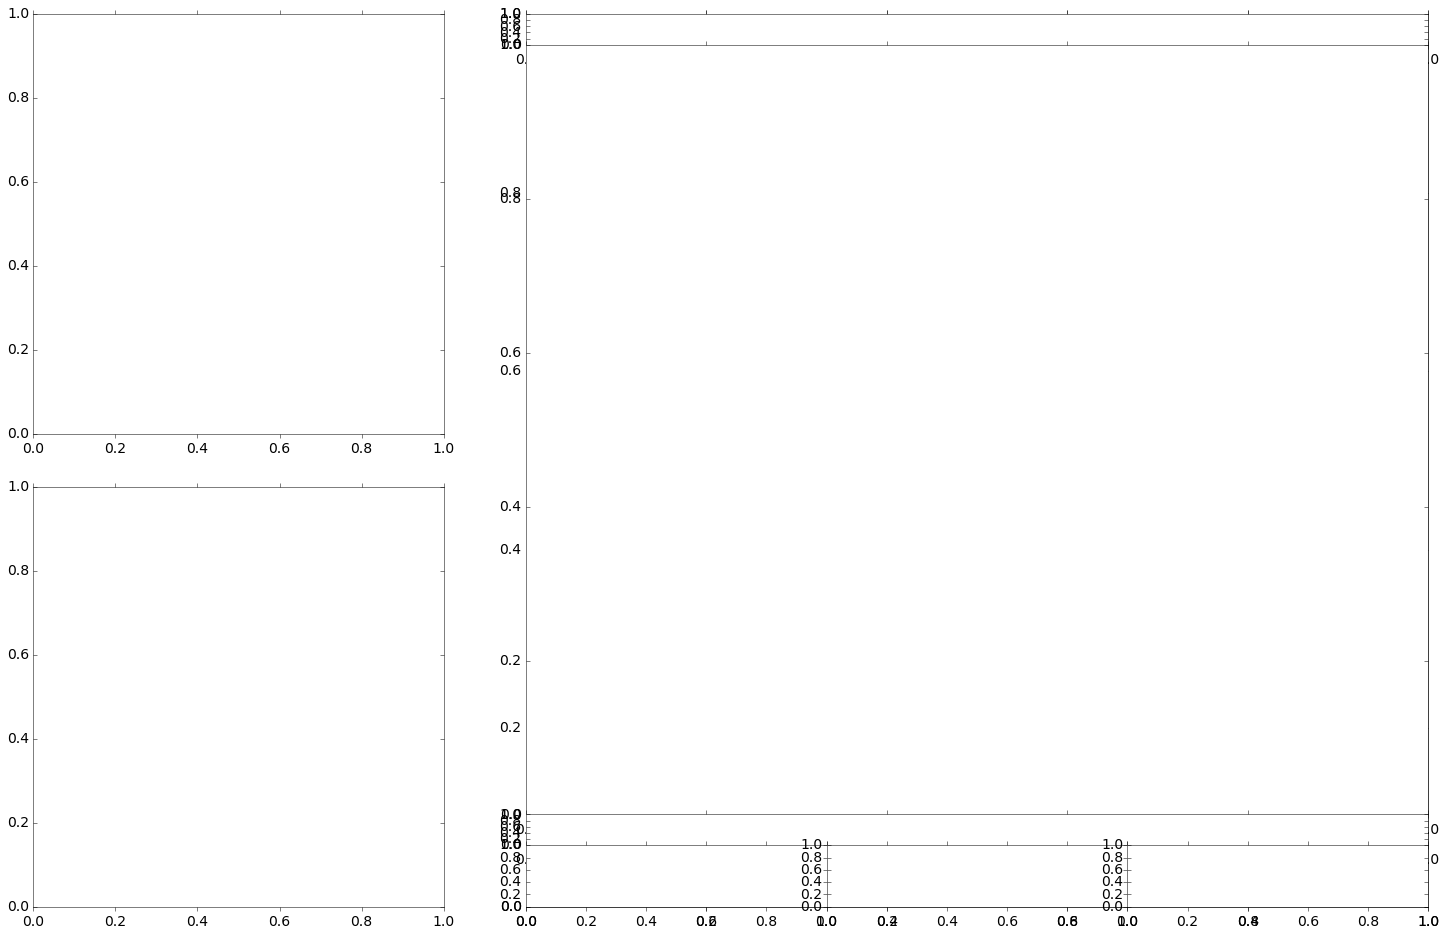

In [22]:
fig = plt.figure(figsize=(25, 16))
gs0 = gridspec.GridSpec(6, 6, wspace=0.5, hspace=0.5)

### A:
ax1 = plt.Subplot(fig, gs0[:3, :2])
fig.add_subplot(ax1)

### B:
ax2 = plt.Subplot(fig, gs0[3:, :2])
fig.add_subplot(ax2)

# # divide subplot into sub-subplots
# gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2:, :2],wspace=0, hspace=0)
# ax21=plt.Subplot(fig,gs00[:2,:]) ## isCardio heatmap
# fig.add_subplot(ax21)
# ax22=plt.Subplot(fig,gs00[2,:]) ## clusters heatmap
# fig.add_subplot(ax22)

### C:
ax3 = plt.Subplot(fig, gs0[:, 2:])
fig.add_subplot(ax3)

# divide subplot into sub-subplots
gs01 = gridspec.GridSpecFromSubplotSpec(116, 3, subplot_spec=gs0[:, 2:],wspace=0, hspace=0)
ax4=plt.Subplot(fig,gs01[:4,:]) ## isCardio heatmap
fig.add_subplot(ax4)
ax5=plt.Subplot(fig,gs01[4:104,:]) ## clusters heatmap
fig.add_subplot(ax5)
ax6=plt.Subplot(fig,gs01[104:108,:]) ## clustersummary heatmap
fig.add_subplot(ax6)

ax7=plt.Subplot(fig,gs01[108:,0]) ## isCardio colorbar
fig.add_subplot(ax7)
ax8=plt.Subplot(fig,gs01[108:,1]) ## cluaters colorbar
fig.add_subplot(ax8)
ax9=plt.Subplot(fig,gs01[108:,2]) ## cluaters sum colorbar
fig.add_subplot(ax9)

plt.show()

# plot functions

## sharing rate analysis

### sharing calculation  helper functions:

In [6]:
def get_data(AllUniqueWithCounts_path):
    
    ### this function gets all data required for sharing comparisons between PNP and Cardio
    ### (Age, gender, isCardio, AllUniqueWithCounts)
    
    print 'age data'
    Age=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Age.xlsx' %MyPath).set_index('BD')
#     print Age.shape
#     print Age.head()

    print 'gender data'
    Gender=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Gender_Male.xlsx' %MyPath).set_index('BD')
#     print Gender.shape
#     print Gender.head()
    
    print 'isCardio data'
    isCardio=pd.read_pickle(PRED_RESULTS_DIR+'TargetDFs/isCardio.dat')

    print 'merging all'
    AgeGender=pd.merge(Age,Gender,how='inner',left_index=True,right_index=True).dropna()
    AgeGenderIsCardio=pd.merge(AgeGender,isCardio,how='inner',left_index=True,right_index=True).dropna()
#     print AgeGenderIsCardio.shape
#     print AgeGenderIsCardio.head()
    
    print 'AllUniqueWithCounts'
    if AllUniqueWithCounts_path is None:
        AllUniqueWithCounts_path='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/\
AllUniqueWithCounts'
    AllUniqueWithCounts=pd.read_pickle(AllUniqueWithCounts_path)

#     print AllUniqueWithCounts.shape
#     print AllUniqueWithCounts.head()
    
    print 'AllUniqueWithCounts_prod'
    AllUniqueWithCounts_prod=AllUniqueWithCounts[AllUniqueWithCounts['prod_stat']==1]
#     print AllUniqueWithCounts_prod.shape
#     print AllUniqueWithCounts_prod.head()
    
    return AllUniqueWithCounts_prod,AgeGenderIsCardio

In [7]:
def calc_seq_per_sample_stats(AllUniqueWithCounts_prod,nToSample):
    
    #this function prints the number of sequences in the 10t,20th and 30th sample in the df
    ## it plots the distribution of number of sequences per sample
    ## and returns a series with number of seqeunces per sample, ordered from highest to lowest
    
    
    AllUniqueWithCounts_prod_count=AllUniqueWithCounts_prod.groupby('Sample').count()['isPublic']
    
#     print AllUniqueWithCounts_prod_count.describe()
    AllUniqueWithCounts_prod_count=AllUniqueWithCounts_prod_count.sort_values(ascending=False)
    
    for n in [10,20,30,nToSample]:
        try:
            print ('n seqs in %sth sample= ' %n,AllUniqueWithCounts_prod_count.iloc[n-1])
        except:
            print ('there are only %s samples' %len(AllUniqueWithCounts_prod_count))
                
    fig,ax=plt.subplots()
    ax.hist(AllUniqueWithCounts_prod_count,bins=25)
#     plt.show()
    
    return AllUniqueWithCounts_prod_count

In [8]:
def calc_seq_per_sample_stats(AllUniqueWithCounts_prod,nToSample):
    
    #this function prints the number of sequences in the 10t,20th and 30th sample in the df
    ## it plots the distribution of number of sequences per sample
    ## and returns a series with number of seqeunces per sample, ordered from highest to lowest
    
    
    AllUniqueWithCounts_prod_count=AllUniqueWithCounts_prod.groupby('Sample').count()['isPublic']
    
#     print AllUniqueWithCounts_prod_count.describe()
    AllUniqueWithCounts_prod_count=AllUniqueWithCounts_prod_count.sort_values(ascending=False)
    
    for n in [10,20,30,nToSample]:
        try:
            print ('n seqs in %sth sample= ' %n,AllUniqueWithCounts_prod_count.iloc[n-1])
        except:
            print ('there are only %s samples' %len(AllUniqueWithCounts_prod_count))
                
    fig,ax=plt.subplots()
    ax.hist(AllUniqueWithCounts_prod_count,bins=25)
#     plt.show()
    
    return AllUniqueWithCounts_prod_count

In [9]:
def get_samples_for_age_decade(min_age,max_age,AgeGenderIsCardio,AllUniqueWithCounts_prod,nToSample=20,nSeqs=None,isRandom=True,random_state_PNP=1,random_state_Cardio=1):
    
    ### this function takes the age range, number of samples and number of sequences to subsample.
    ### first it gets all PNP and Cardio samples in the age range.
    ### than it checks how many sequences are in each of those samples
    ### than it selects samples - if there are enough samples with the desired number of sequences, 
    ### it selects samples randomly, or the samples with the highest number of sequences (according to)
    ### the isRandom parameter)
    ### if there are not enough samples, it won't be able to return dataframes and an error will occure
    
    ###get all avaiable PNP and Cardio samples for the age range
    #PNP:
    df=AgeGenderIsCardio

    print 'PNP samples'
    PNP_males_ageDecade=df[(df['Age']>min_age) & (df['Age']<=max_age) & (df['Gender_Male']==1) & (df['isCardio']==0)]
       
    L=drop_relatives(PNP_males_ageDecade,onlyBloodRels=False)
#     print ('relatives in list: ',L)
    if len(L)>0:
        print ('dropping the following samples because they are relatives: ', L)
        PNP_males_ageDecade=PNP_males_ageDecade.drop(L)
        
    print 'removing samples that are not in AllUniqueWithCounts_prod:'
    PNP_males_ageDecade=PNP_males_ageDecade[PNP_males_ageDecade.index.isin(AllUniqueWithCounts_prod.Sample.unique())]
    
#     print PNP_males_ageDecade.shape
#     print PNP_males_ageDecade.head()
    
    print 'getting stats on PNP samples:'
    AllUniqueWithCounts_prod_count_PNP=\
calc_seq_per_sample_stats(AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(PNP_males_ageDecade.index)],
                         nToSample)

    #Cardio
    print 'cardio samples'
    Cardio_males_ageDecade=df[(df['Age']>min_age) & (df['Age']<=max_age) & (df['Gender_Male']==1) & (df['isCardio']==1)]
       
    print 'removing samples that are not in AllUniqueWithCounts_prod:'
    Cardio_males_ageDecade=Cardio_males_ageDecade[Cardio_males_ageDecade.index.isin(AllUniqueWithCounts_prod.Sample.unique())]
    
#     print Cardio_males_ageDecade.shape
#     print Cardio_males_ageDecade.head()
    
    print 'getting stats on Cardio samples:'
    AllUniqueWithCounts_prod_count_Cardio=\
calc_seq_per_sample_stats(AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(Cardio_males_ageDecade.index)],
                         nToSample)
    
    
    ###check that there are enough samples with the desired nSeqs, and select samples:
    
    
    
    #PNP
    if nSeqs is None:
        if isRandom:
            print 'randomly selecting %s samples from PNP samples' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.sample(n=nToSample,random_state=random_state_PNP)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.loc[ AllUniqueWithCounts_prod_count_PNP[:nToSample].index,:] 
    elif AllUniqueWithCounts_prod_count_PNP.iloc[nToSample-1]<nSeqs:
        print ('nSeq= ', nSeqs)
        print ('n seqs in %sth sample: ' %(nToSample-1), AllUniqueWithCounts_prod_count_PNP.iloc[nToSample-1])
        print 'not enough samples with the desired number of seqs in PNP'
    elif AllUniqueWithCounts_prod_count_PNP.iloc[nToSample-1]==nSeqs:
        print 'number of samples with the desired number of seqs is equal to the number of desired samples (PNP)'
        PNP_males_ageDecade_s=PNP_males_ageDecade
    else:
        print 'There are more samples with the desired number of seqs than the number of desired samples (PNP)'
        if isRandom:
            print 'randomly selecting %s samples from PNP samples' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.sample(n=nToSample,random_state=random_state_PNP)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.loc[ AllUniqueWithCounts_prod_count_PNP[:nToSample].index,:]
#     print PNP_males_ageDecade_s.shape
#     print PNP_males_ageDecade_s.head()
    PNP_males_ageDecade_samples=PNP_males_ageDecade_s.index.tolist()
    
    #Cardio:
    if nSeqs is None:
        if isRandom:
            print 'randomly selecting %s samples from Cardio samples' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.sample(n=nToSample,random_state=random_state_Cardio)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.loc[AllUniqueWithCounts_prod_count_Cardio[:nToSample].index,:]
    elif AllUniqueWithCounts_prod_count_Cardio.iloc[nToSample-1]<nSeqs:
        print 'not enough samples with the desired number of seqs in Cardio'
    elif AllUniqueWithCounts_prod_count_Cardio.iloc[nToSample-1]==nSeqs:
        print 'number of samples with the desired number of seqs is equal to the number of desired samples (Cardio)'
        Cardio_males_ageDecade_s=Cardio_males_ageDecade
    else:
        print 'There are more samples with the desired number of seqs than the number of desired samples (Cardio)'
        if isRandom:
            print 'randomly selecting %s samples from Cardio samples' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.sample(n=nToSample,random_state=random_state_Cardio)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.loc[AllUniqueWithCounts_prod_count_Cardio[:nToSample].index,:]
 
#     print Cardio_males_ageDecade_s.shape
#     print Cardio_males_ageDecade_s.head()
    Cardio_males_ageDecade_samples=Cardio_males_ageDecade_s.index.tolist()
        
    ###comparing age distributions:    
#     print 'comparing age distribution'
    dataList=[('Healthy' ,PNP_males_ageDecade_s.Age.tolist()),('Patients' ,Cardio_males_ageDecade_s.Age.tolist())]
    title=''

    fig,ax=plt.subplots()
    ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,showLegend=True,nBins=5,
                            toAnnotate=True, colorList=['Grey','darkred'],alpha=None, plotType='hist')

#     plt.show()
#     print ('n samples in PNP sample list: ', len(PNP_males_ageDecade_samples))
#     print ('n samples in Cardio sample list: ', len(Cardio_males_ageDecade_samples))
    
    return fig,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples
    

In [10]:
def subsample_sequences_for_samples(AllUniqueWithCounts_prod,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples,nSeqs=None):
    
    ### this function selects randomly the desired number of sequences from each sample in the PNP and Cardio dfs,
    ### if there is a sample with not enough sequences, it will fail
#     print ('n samples in PNP sample list: ', len(PNP_males_ageDecade_samples))
#     print ('n samples in Cardio sample list: ', len(Cardio_males_ageDecade_samples))
    
    PNP_data=AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(PNP_males_ageDecade_samples)]
    Cardio_data=AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(Cardio_males_ageDecade_samples)]
    
#     print ('PNP_data.Sample.nunique(): ',PNP_data.Sample.nunique())
#     print ('Cardio_data.Sample.nunique(): ',Cardio_data.Sample.nunique())
    
#     print 'generating df containing selected PNP and Cardio samples...'
    df=pd.concat([PNP_data,Cardio_data])
#     print df.shape
#     print df.iloc[:5,:5]
    
    if nSeqs is None:
#         print 'nSeqs is None, no subsampling, all sequences are used'
        subsampled_df=df
    else:
        subsampled_df_list=[]
#         print 'subsampling sequences...'
        for n,sample in enumerate(df['Sample'].unique().tolist()):
            if n%10==0: print n
            df2=df[df['Sample']==sample]
            df_s=df2.sample(n=nSeqs,random_state=1)
            subsampled_df_list.append(df_s)

#         print 'concatenating subsampled dfs'
        subsampled_df=pd.concat(subsampled_df_list)
#         print subsampled_df.shape
#         print subsampled_df.head()

    return subsampled_df
    
    

In [11]:
def calc_sharing_rate_per_sample(ax,subsampled_df,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples,
                                 nseqs,nSampledShared, toPlot=True):
    subsampled_df=subsampled_df.reset_index()
    
    dataList=[]
    for item in [('Healthy',PNP_males_ageDecade_samples),('Patients',Cardio_males_ageDecade_samples)]:
        dataset_name=item[0]
        sample_list=item[1]
        
#         print ('******dataset: '+ dataset_name+'********')
        
        subsampled_df_dataset=subsampled_df[subsampled_df.Sample.isin(sample_list)]
        sampleBySeq_ss=subsampled_df_dataset.pivot(index='Sample',columns='index',values='prod_stat').fillna(0)
    
#         print sampleBySeq_ss.shape
#         print sampleBySeq_ss.iloc[:5,:5]
#         print sampleBySeq_ss.sum().min()
#         print sampleBySeq_ss.sum().max()
    
        public_seqs=sampleBySeq_ss.sum()[sampleBySeq_ss.sum() >= nSampledShared].index
        sampleBySeq_ss_public=sampleBySeq_ss.loc[:,public_seqs]
#         print ('sampleBySeq_ss.shape:' ,sampleBySeq_ss.shape)
#         print ('sampleBySeq_ss_public.shape:' ,sampleBySeq_ss_public.shape)
    
        seqSum=sampleBySeq_ss.sum(axis=1).rename('seqSum')
        publicSeqSum=sampleBySeq_ss_public.sum(axis=1).rename('publicSeqSum')
        merged=pd.merge(pd.DataFrame(seqSum),pd.DataFrame(publicSeqSum),how='inner',left_index=True,right_index=True)
#         print ('merged.shape:' ,merged.shape)
        merged['perc_public']=100*merged['publicSeqSum'].astype(float) / merged['seqSum']
#         print 'merged:'
#         print merged.head(10)
    
        perc_public_list=merged['perc_public'].tolist()
#         print ('perc_public_list[:10]: ',perc_public_list[:10])
    
        dataList.append(tuple([item[0],perc_public_list]))
    s_MW,p_MW=mannwhitneyu(dataList[0][1],dataList[1][1])
    mean_healthy=np.mean(dataList[0][1])
    sem_healthy=sem(dataList[0][1])
    mean_patients=np.mean(dataList[1][1])
    sem_patients=sem(dataList[1][1])
    
#     fig,ax=plt.subplots()
    if toPlot:
        title=''

        ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,
                            title,showLegend=True,nBins=20,toAnnotate=True,alpha=None,plotType='kde',
                            colorList=['grey','darkred'])
        ax.text(0.02,0.05,'p-value=%s (MW)' %p_MW, transform=ax.transAxes,ha='left',va='top')
#         plt.show()
    
    return fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,sem_healthy,mean_patients,sem_patients

In [12]:
sem([1,1,1,1])

0.0

In [13]:
def sharing_rate_comparison_PNP_Cardio(ax,AllUniqueWithCounts_path=None,min_age=50,m_age=60,nToSample=20,
                                       nSeqs=2000,isRandom=True,nSampledShared=2,random_state_PNP=1,random_state_Cardio=1):
    
    ## get data:
    
    AllUniqueWithCounts_prod,AgeGenderIsCardio=get_data(AllUniqueWithCounts_path)
        
    ## select samples
    fig,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples=get_samples_for_age_decade(min_age,m_age,AgeGenderIsCardio,
                    AllUniqueWithCounts_prod,nToSample=nToSample,
                    nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)
    
    ##subsample sequences:
    subsampled_df = subsample_sequences_for_samples(AllUniqueWithCounts_prod,PNP_males_ageDecade_samples,
                                                    Cardio_males_ageDecade_samples,nSeqs=nSeqs)
    
    #compare sharing rates:
    fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,sem_healthy,mean_patients,sem_patients = calc_sharing_rate_per_sample(ax,subsampled_df,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples,
                                                    nSeqs,nSampledShared,toPlot=False)
    
    #save figure:
    
    
    return fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,sem_healthy,mean_patients,sem_patients
    

### fig 3A function (compare sharing rates):

In [14]:
#wrap the previous function with definition of input variables (include shuffled)

def compare_sharing_rate(ax,useExistingDF=True):
    
    if not useExistingDF:
        min_age=45
        max_age=70
        nToSample=20
        nSeqs=11500
        isRandom=False

        df=pd.DataFrame()
        nShared_list=[2,4,6,8,10]


        for n in nShared_list:

            nSampledShared=n

            fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,sem_healthy,mean_patients,sem_patients=\
    sharing_rate_comparison_PNP_Cardio(ax,AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
            nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)


            print '#####################################'
            print n
            print mean_healthy,sem_healthy,mean_patients,sem_patients,p_MW,sampleBySeq_ss
            print '#####################################'
            print ''

            df.loc[n,'mean_healthy']=mean_healthy
            df.loc[n,'sem_healthy']=sem_healthy
            df.loc[n,'mean_patients']=mean_patients
            df.loc[n,'sem_patients']=sem_patients
            df.loc[n,'p_MW']=p_MW
            
        df.to_excel(FIG3_DIR+'3Adf_sharing_comparison.xlsx')
        print 'saved df to excel'
            
    df=pd.read_excel(FIG3_DIR+'3Adf_sharing_comparison.xlsx')
    
    print df

    ax.plot(df['mean_healthy'],color='grey',marker='o',label='Healthy')
    # ax.plot(df['mean_healthy'],color='grey')
    ax.plot(df['mean_healthy']-df['sem_healthy'],color='grey',alpha=0.5)
    ax.plot(df['mean_healthy']+df['sem_healthy'],color='grey',alpha=0.5)
    ax.plot(df['mean_patients'],color='darkred',marker='o',label='Patients')
    ax.plot(df['mean_patients']-df['sem_patients'],color='darkred',alpha=0.5)
    ax.plot(df['mean_patients']+df['sem_patients'],color='darkred',alpha=0.5)


    for n in df.index:
        if n in [4,6,10]:
            ax.text(n,(df.loc[n,'mean_healthy']) +0.03,'*',color='black',fontsize='large',fontweight='bold',ha='center')
        elif n == 8:
            ax.text(n,(df.loc[n,'mean_healthy']) +0.03,'**',color='black',fontsize='large',fontweight='bold',ha='center')
    ax.set_xlim(1,11)
    ax.set_xticks(df.index)
    ax.set_xlabel('# Shared Samples')
    ax.set_ylabel('Shared Sequence Rate\n(Percentage,Log Scale)')

    ax.legend(loc='lower left')

    ax.set_yscale('log')

   
    return ax,df

In [15]:
plt.show()

    mean_healthy  sem_healthy  mean_patients  sem_patients      p_MW
2       7.478261     0.080781       7.543043      0.078305  0.224351
4       1.359565     0.022001       1.247826      0.023600  0.001059
6       0.445217     0.013815       0.367391      0.010815  0.000372
8       0.166087     0.007568       0.115652      0.004809  0.000007
10      0.067391     0.004082       0.054783      0.002369  0.004217


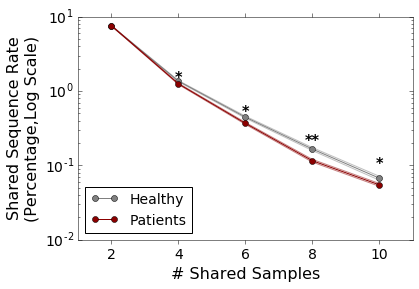

In [16]:
fig3,ax3=plt.subplots()
ax3,df=compare_sharing_rate(ax3,useExistingDF=True)
plt.show()

### plot 3A inside figure 3:

In [ ]:
fig = plt.figure(figsize=(25, 16))
gs0 = gridspec.GridSpec(6, 5, wspace=0.5, hspace=0.5)

### A:
ax1 = plt.Subplot(fig, gs0[:2, :2])
fig.add_subplot(ax1)
ax1,df=compare_sharing_rate(ax1,useExistingDF=True)

### B:
ax2 = plt.Subplot(fig, gs0[2:, :2])
fig.add_subplot(ax2)

# divide subplot into sub-subplots
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2:, :2],wspace=0, hspace=0)
ax21=plt.Subplot(fig,gs00[:2,:]) ## isCardio heatmap
fig.add_subplot(ax21)
ax22=plt.Subplot(fig,gs00[2,:]) ## clusters heatmap
fig.add_subplot(ax22)

### C:
ax3 = plt.Subplot(fig, gs0[:, 2:])
fig.add_subplot(ax3)

# divide subplot into sub-subplots
gs01 = gridspec.GridSpecFromSubplotSpec(116, 3, subplot_spec=gs0[:, 2:],wspace=0, hspace=0)
ax4=plt.Subplot(fig,gs01[:4,:]) ## isCardio heatmap
fig.add_subplot(ax4)
ax5=plt.Subplot(fig,gs01[4:104,:]) ## clusters heatmap
fig.add_subplot(ax5)
ax6=plt.Subplot(fig,gs01[104:108,:]) ## clustersummary heatmap
fig.add_subplot(ax6)

ax7=plt.Subplot(fig,gs01[108:,0]) ## isCardio colorbar
fig.add_subplot(ax7)
ax8=plt.Subplot(fig,gs01[108:,1]) ## cluaters colorbar
fig.add_subplot(ax8)
ax9=plt.Subplot(fig,gs01[108:,2]) ## cluaters sum colorbar
fig.add_subplot(ax9)

plt.show()

## 3B: PCOA ANALYSIS

### functions:

the function calc_PCoA to Feature_Phenotype_Functions.py

In [54]:
def fig3b_plotPairWiseDistance(df_condensed_org,ax):
    df_condensed_org['sample1_isPatient']=np.where(df_condensed_org['sample1'].isin(Cardio126),1,0)
    df_condensed_org['sample2_isPatient']=np.where(df_condensed_org['sample2'].isin(Cardio126),1,0)
    df_condensed_org['samples_isPatient_sum']=df_condensed_org[['sample1_isPatient','sample2_isPatient']].sum(axis=1)
    df_condensed_org['samples_isPatient_mapped']=df_condensed_org['samples_isPatient_sum'].map({0:'Both healthy',
                                           1:'1 patient',2:'Both patients' })
    
    dataList=[('Both healthy',df_condensed_org[df_condensed_org['samples_isPatient_mapped']=='Both healthy']['dist']),
          ('Both patients',df_condensed_org[df_condensed_org['samples_isPatient_mapped']=='Both patients']['dist'])]

    title=''
    colorList=['grey','darkred']
    alpha=1
    text_kws={'fontsize':'large','fontweight':'bold','color':'red',
                                    'horizontalalignment':'left','verticalalignment':'top'}
    plotType='kde'



    ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,showLegend=False,nBins=20,toAnnotate=False,
                          colorList=colorList,alpha=alpha,
                          text_kws=text_kws,plotType=plotType)
    ax.text(0.02,0.95,'p=%.0E (t-test)' %t_p_cohort1_cohort2,transform=ax.transAxes,ha='left',va='top',
               fontsize='medium')
   
    ax.set_ylabel('Density'); ax.set_xlabel('Pair-wise sample distances')
    handles, labels = ax.get_legend_handles_labels()
    labels=[label.replace('Both ','') for label in labels]
    ax.legend(loc='lower left',labels=labels,fontsize=14)
    return ax
    

In [55]:
def fig3B_plot_PCoA_balancedMales(ax_PCoA,ax_PCoA_dist):
    
    print 'reading cluster matrix...'
    sampleByClusterDF=pd.read_pickle('/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/\
sharingAnalysis/seqClusters_allProd_maxdist1/sampleByClusterDF_cohortfiltering005-085perc_dropped.dat')
    print 'binarizing matrix...'
    sampleByClusterDF_binary=(sampleByClusterDF>0).astype(int)
    # get samples lists:
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530_balancedAge_males') as fp:
        PNP530_balancedAge_males=pickle.load(fp)
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126_balancedAge_males') as fp:
        Cardio126_balancedAge_males=pickle.load(fp)
    sampleByClusterDF_binary_balanced=sampleByClusterDF_binary.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males,:].fillna(0)
    print ('sampleByClusterDF_binary_balanced shape: ',sampleByClusterDF_binary_balanced.shape)
    
    
    #calculate PCoA and plot:
    df=sampleByClusterDF_binary_balanced
    metric='jaccard'
    sample_list_list=[('Healthy',PNP530_balancedAge_males),('Patients',Cardio126_balancedAge_males)]
    color_list=['grey','darkred']
    pcoa_n1_toplot=0
    pcoa_n2_toplot=1
    toScale=False,
    toAnnotate=False

    pcoa_df,fig,ax,df_condensed_org=calc_PCoA(df,metric,sample_list_list,color_list,pcoa_n1_toplot=0,pcoa_n2_toplot=1,toScale=False,
                 toAnnotate=False,ax=ax_PCoA,calculateSeperation=False)
    replacement_list=[("Text(0.5,0,u'",""),("Text(0,0.5,u'",""),("')",""),("PC0","PC1")]
    Xlabel= ax_PCoA.xaxis.get_label()
    Ylabel= ax_PCoA.yaxis.get_label()
    print ('original Xlabel is ',Xlabel)
    print ('original Ylabel is ',Ylabel)
    for item in replacement_list:
        Xlabel= str(Xlabel).replace(item[0],item[1])
        Ylabel= str(Ylabel).replace(item[0],item[1])
        Ylabel= str(Ylabel).replace("PC1","PC2")
    
    dist_pcoa_toplot=0
    
    dataList=[('Healthy',pcoa_df.loc[PNP530_balancedAge_males, pcoa_n1_toplot]),
         ('Patients',pcoa_df.loc[Cardio126_balancedAge_males, pcoa_n1_toplot])]
    title=''
    colorList=['grey','darkred']
    alpha=1
    text_kws={'fontsize':'large','fontweight':'bold','color':'red',
                                    'horizontalalignment':'left','verticalalignment':'top'}
    plotType='kde'

#     ax_PCoA_dist,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax_PCoA_dist,
#                     title,showLegend=False,nBins=20,toAnnotate=False,colorList=colorList,alpha=alpha,
#                           text_kws=text_kws,plotType=plotType)

    ax_PCoA_dist=fig3b_plotPairWiseDistance(df_condensed_org,ax_PCoA_dist)
    
    
    #some more edits:
    ax_PCoA.set_xticklabels('')
    ax_PCoA.set_title('')
    ax_PCoA.set_yticks([-0.2,-0.1,0,0.1,0.2])
#     ax_PCoA.yaxis.set_major_locator(plt.MaxNLocator(5))
    t_p_cohort1_cohort2=0.01
    ax_PCoA.text(0.02,0.95,'p=%s (PCo%s,t-test)' %(round(t_p_cohort1_cohort2,2),dist_pcoa_toplot+1),horizontalalignment='left',
          verticalalignment='top', transform=ax_PCoA.transAxes,fontsize='x-large')
#     fontsize=mpl.rcParams['axes.labelsize']-4
    ax_PCoA.set_ylabel(Ylabel,fontsize=mpl.rcParams['axes.labelsize'])
    handles, labels = ax_PCoA.get_legend_handles_labels()
    ax_PCoA.legend(loc='lower left',labels=labels,fontsize=14)
    
    ax_PCoA.set_xlabel(Xlabel)
    ax_PCoA_dist.set_ylabel('Density',labelpad=25,fontsize=mpl.rcParams['axes.labelsize'])
    ax_PCoA_dist.set_yticks([0,5,10])
    
    # fig.align_ylabels(axes=[ax_PCoA,ax_PCoA_dist])
    ax_PCoA.yaxis.set_label_coords(-0.1, 0.5)
    ax_PCoA_dist.yaxis.set_label_coords(-0.1, 0.5)
    
    return ax_PCoA,ax_PCoA_dist




In [56]:
def fig3B_plot_PCoA_balancedMales_new(ax_PCoA_dist):
    
    print 'reading cluster matrix...'
    sampleByClusterDF=pd.read_pickle('/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/\
sharingAnalysis/seqClusters_allProd_maxdist1/sampleByClusterDF_cohortfiltering005-085perc_dropped.dat')
    print 'binarizing matrix...'
    sampleByClusterDF_binary=(sampleByClusterDF>0).astype(int)
    # get samples lists:
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530_balancedAge_males') as fp:
        PNP530_balancedAge_males=pickle.load(fp)
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126_balancedAge_males') as fp:
        Cardio126_balancedAge_males=pickle.load(fp)
    sampleByClusterDF_binary_balanced=sampleByClusterDF_binary.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males,:].fillna(0)
    print ('sampleByClusterDF_binary_balanced shape: ',sampleByClusterDF_binary_balanced.shape)
    
    
    # generate df_condensed_org:
    ## sample_list_list = list of tuples, each tuple is composed of a string which is the name of the sample list, and the sample list
    from skbio.stats.ordination import PCoA
    from skbio.stats.distance import DistanceMatrix
    
    df=sampleByClusterDF_binary_balanced
    metric='jaccard'
    sample_list_list=[('Healthy',PNP530_balancedAge_males),('Patients',Cardio126_balancedAge_males)]
    color_list=['grey','darkred']
    toScale=False,
    toAnnotate=False
    
    ###generate distance matrix:
    print 'generating distance matrix...'
    df_condensed_org, distMat_square=genDistMat(df,metric,generateSquareform=False)

    ax_PCoA_dist=fig3b_plotPairWiseDistance(df_condensed_org,ax_PCoA_dist)
    
    
    #some more edits:
#     ax_PCoA.set_xticklabels('')
#     ax_PCoA.set_title('')
#     ax_PCoA.set_yticks([-0.2,-0.1,0,0.1,0.2])
# #     ax_PCoA.yaxis.set_major_locator(plt.MaxNLocator(5))
#     t_p_cohort1_cohort2=0.01
#     ax_PCoA.text(0.02,0.95,'p=%s (PCo%s,t-test)' %(round(t_p_cohort1_cohort2,2),dist_pcoa_toplot+1),horizontalalignment='left',
#           verticalalignment='top', transform=ax_PCoA.transAxes,fontsize='x-large')
# #     fontsize=mpl.rcParams['axes.labelsize']-4
#     ax_PCoA.set_ylabel(Ylabel,fontsize=mpl.rcParams['axes.labelsize'])
#     handles, labels = ax_PCoA.get_legend_handles_labels()
#     ax_PCoA.legend(loc='lower left',labels=labels,fontsize=14)
    
#     ax_PCoA.set_xlabel(Xlabel)
    ax_PCoA_dist.set_ylabel('Density',labelpad=25,fontsize=mpl.rcParams['axes.labelsize'])
    ax_PCoA_dist.set_yticks([0,5,10])
    
    # fig.align_ylabels(axes=[ax_PCoA,ax_PCoA_dist])
#     ax_PCoA.yaxis.set_label_coords(-0.1, 0.5)
    ax_PCoA_dist.yaxis.set_label_coords(-0.1, 0.5)
    
    return ax_PCoA_dist




In [57]:
def genDistMat(df, metric,generateSquareform=True):

    # generate distance series:
    print 'generating condensed distance matrix using %s' % metric
    distMat_condensed = pd.Series(pdist(df, metric))

    # add sample names:
    sample1List = []
    sample2List = []

    count = 0
    for i in range(len(df.index)):
        for j in range(i + 1, len(df.index)):
            sample1 = df.index[i]
            sample2 = df.index[j]
            sample1List.append(sample1)
            sample2List.append(sample2)
            count = count + 1
    #     print count
    df_condensed_org = pd.DataFrame({'sample1':sample1List, 'sample2':sample2List, 'dist':distMat_condensed})
    print 'top similar pairs:'
    print df_condensed_org.sort_values(by='dist').head(10)
    

    # GENERATE SQUAREFORM DISTANCE MATRIX AND SAVE:
    if generateSquareform:
        print 'generating squareform distance matrix using %s' % metric
        distMat_square = pd.DataFrame(squareform(pdist(df, metric)), columns=df.index, index=df.index)
        #     print TCRdf_RA_distMat_square.iloc[:5,:5]
    else:
        distMat_square=None
    
    return df_condensed_org, distMat_square

### run seperately

reading cluster matrix...
binarizing matrix...
('sampleByClusterDF_binary_balanced shape: ', (150, 536761))
generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
          dist sample1 sample2
763   0.798177    BD27   BD124
814   0.800100    BD27  BD1083
769   0.813734    BD27   BD106
4510  0.815050   BD124   BD106
4555  0.816545   BD124  BD1083
776   0.819343    BD27   BD150
856   0.819679    BD27   BD984
9136  0.823167  BD1083   BD984
5224  0.824113   BD106  BD1083
5959  0.824178   BD150  BD1083
generating kde plot
generating kde plot


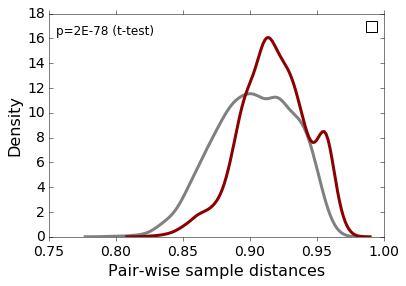

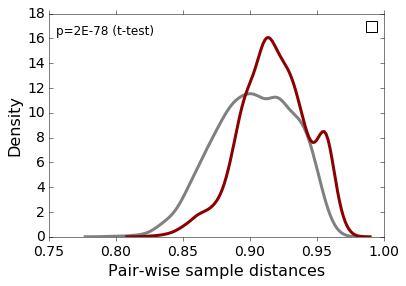

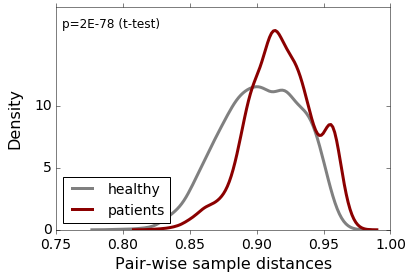

In [58]:
fig,ax = plt.subplots(figsize=(6, 4))

fig3B_plot_PCoA_balancedMales_new(ax)

plt.show()

        ## 3C:  sequence cluster heat map for top differntial clusters

## 3c:

### function:

In [174]:
def plot_sequence_cluster_heatmap_fig3(targetDF,Y_pred,sampleByClusterDF,cluster_sum,
                                ax_heatmap1,ax_heatmap2,ax_heatmap3,
                                ax_colorbar1,ax_colorbar2,ax_colorbar3,
                                  showPredCbar=True,max_val=6,binary=True):
    
    ### inputs are: targetDF = (Y_true), Y_pred, sampleByClusterDF, cluster_sum (summary of number of 
    ### seqeunces in clusters that are includesd in the cluster-list presnted, per sample)
    ### make sure all of the above 4 dfs include the same clusters (cluster list) and do not include nans
    ### Y_pred should be astype 'float'

    ##max_val can be None and then will be set to the maximal value if the data
    
    print 'get data...'
    Yname=targetDF.columns.tolist()[0]
    
    # get Y_pred data:
    Y_pred=Y_pred.rename(columns={Y_pred.columns[0]:'pred_proba'}).astype('float')
    Y_pred=pd.DataFrame(Y_pred)
    
    #edit cluster_sum info
    cluster_sum=pd.DataFrame(cluster_sum)
    cluster_sum=cluster_sum.rename(columns={cluster_sum.columns[0]:'cluster_sum'})
#     print cluster_sum.head()
       
    print 'merging info...'
    #merge all and sort by Y and Y_pred:
    merged=pd.merge(targetDF,Y_pred,how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,cluster_sum,how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,sampleByClusterDF,how='inner',left_index=True,right_index=True)
    merged=merged.sort_values(by=[Yname,'pred_proba'],ascending=False)
#     print ('merged.shape: ',merged.shape)
#     print merged.head()   
    df =  merged[[Yname,'pred_proba']]

    #generate seperate df for each part of the image:
#     print 'df:'
#     print df.head()
    df2 = merged.iloc[:,3:]
#     print 'df2:'
#     print df2.head()
    df3=pd.DataFrame(merged['cluster_sum'])
#     print df3.head()

    #generate figure:
    print 'generating figure...'
    print ('max val is: ',df2.max().max())
    if max_val is None:
        max_val=int(df2.max().max())
    min_val=0
    dif=max_val-min_val
#     print dif
    
    print 'generating heat map1'
    hp1=sns.heatmap(df.T, cmap="Greys", ax=ax_heatmap1, cbar=False,linewidth=0.05)
    if showPredCbar:
        cbar_1=fig.colorbar(ax_heatmap1.collections[0],ax=ax_colorbar1,use_gridspec=False,location='bottom', pad=0.08,fraction=0.4,aspect=10)
        if binary:
            cbar_1.set_ticks([0,0.5,1])
        else:
            cbar_1.set_ticklabels(range(dif+1))
    
    print 'generating heat map2...'
    cmap_2 = plt.get_cmap('Reds', dif+1)
    hp2=sns.heatmap(df2.T, cmap=cmap_2, ax=ax_heatmap2, cbar=False,linewidth=0.05,vmin = min_val, vmax = max_val,yticklabels=True)
    cbar_2=fig.colorbar(ax_heatmap2.collections[0], ax=ax_colorbar2, use_gridspec=False,location='bottom', pad=0.08, fraction=0.4, aspect=10)
    cbar_2.set_ticks([float(dif)/12 + float(dif)*x/(dif+1) for x in range(dif+1)])
    cbar_2.set_ticklabels(range(dif+1))
    
    print 'generating heat map 3...'
    cmap_3='Blues'
    hp3=sns.heatmap(df3.T, cmap=cmap_3, ax=ax_heatmap3, cbar=False,linewidth=0.05)
    cbar_3=fig.colorbar(ax_heatmap3.collections[0], ax=ax_colorbar3, use_gridspec=False,location='bottom', pad=0.08, fraction=0.4, aspect=10)
    cbar_3.set_ticks([0,40,80])
    
    for ax in [ax_heatmap1,ax_heatmap3,ax_colorbar1,ax_colorbar2,ax_colorbar3]:
        ax= remove_spines(ax) 
        
    ax_heatmap2=remove_spines(ax_heatmap2,removeTicklabels=False)    
    ax_heatmap2.set_xticklabels([])
    print ('index length: ',len(df2.T.index.tolist()))
    ax_heatmap2.set_yticklabels(df2.T.index.tolist(),fontsize=5)
    print ('yticklabels: ',ax_heatmap2.get_yticklabels())
#     ax_heatmap2.yaxis.tick_right()
#     ax_heatmap2.yaxis.set_label_position("right")
              
    return ax_heatmap1,ax_heatmap2,ax_heatmap3,ax_colorbar1,ax_colorbar2,ax_colorbar3
    

In [175]:
def fig3C_topClusters_heatmap(ax_heatmap1,ax_heatmap2,ax_heatmap3,ax_colorbar1,ax_colorbar2,ax_colorbar3, get_annot_for_seqs=False):
    PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
    #get top 100 clusters:
    top_diff_clusters=pd.read_excel(CLUSTER_ANALYSIS_DIR+'Fisher_MW_comparisons/PNP530_balancedAge_males_prodClusRed\
_Cardio126_balancedAge_males_prodClusRed_percShared01_percTooMany085_top100p05_analyzed.xlsx')
    cluster_list=top_diff_clusters['cluster_head'].dropna().tolist()
    print ('begning of cluster list: ',cluster_list[:10])
    
    #get data:
    print 'getting data...'
    sampleByClusterDF=pd.read_pickle('/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/\
sharingAnalysis/seqClusters_allProd_maxdist1/sampleByClusterDF_cohortfiltering005-085perc_dropped.dat')
    # get samples lists:
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530_balancedAge_males') as fp:
        PNP530_balancedAge_males=pickle.load(fp)
    with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126_balancedAge_males') as fp:
        Cardio126_balancedAge_males=pickle.load(fp)
        sampleByClusterDF_balanced_clusterList=sampleByClusterDF.\
    loc[PNP530_balancedAge_males+Cardio126_balancedAge_males,cluster_list].fillna(0)
    print ('sampleByClusterDF_balanced_clusterList.shape: ',sampleByClusterDF_balanced_clusterList.shape)
    
    #calculate sum of relevant clusters in a sample:
    print 'calculating sum of relevant clusters in a sample'
    cluster_sum=sampleByClusterDF_balanced_clusterList.sum(axis=1)
    
    #get target data:
    isCardio=pd.read_pickle(PRED_RESULTS_DIR+'TargetDFs/isCardio.dat')
    iscardio_balanced=isCardio.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males]
    print ('iscardio_balanced.shape: ',iscardio_balanced.shape)
    
    Y_pred=pd.read_pickle(PRED_RESULTS_DIR+'isCardio/XGB_randomSearch_25_byRepFeatPCA10RelsVDJnocorr0999AgeGender/\
predictions_df.pkl')
    Y_pred=Y_pred.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males]
    print ('Y_pred.shape: ',Y_pred.shape)
    
    #plot basic heatmap:
    print 'plotting...'
    cluster_list=top_diff_clusters['cluster_head'].tolist()[:100]
    
    ###check identities for cluster list:
    if get_annot_for_seqs:
        PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
        output_dir='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'
        identities=pd.read_excel('%s/TCR CDR3 sequence databases/combined annotation_list_clean_popped.xlsx' %MyPath)
        summaryDF=pd.DataFrame()
        df2,phen_related_identities=get_annot_for_seqs_in_cluster(df=None,cluster_head_col=None,output_dir=output_dir,getIdentities=True,cluster_head_list=cluster_list)
        df2.to_excel(FIG2_DIR+'top100seqs_identities.xlsx')

    
    targetDF=iscardio_balanced
    sampleByClusterDF=sampleByClusterDF_balanced_clusterList

    showPredCbar=True
    max_val=None
    binary=True
    
    ax_heatmap1,ax_heatmap2,ax_heatmap3,ax_colorbar1,ax_colorbar2,ax_colorbar3=plot_sequence_cluster_heatmap_fig3(targetDF,
                                Y_pred,sampleByClusterDF,cluster_sum,
                                ax_heatmap1,ax_heatmap2,ax_heatmap3,
                                ax_colorbar1,ax_colorbar2,ax_colorbar3,
                                showPredCbar,max_val,binary)
    
    ###some edits:
    
    # add vertical lines for all 3 heatmaps and titles for heatmap 1
    for ax in [ax_heatmap1,ax_heatmap2,ax_heatmap3]:
        ax.axvline(x=len(Cardio126_balancedAge_males),color='red')
        
        if ax==ax_heatmap1:
            x_patients=len(Cardio126_balancedAge_males)/2
            x_healthy=len(Cardio126_balancedAge_males)+len(PNP530_balancedAge_males)/2
            ax.text(x_patients,5,'Patients',ha='center',va='top',fontsize='x-large')
            ax.text(x_healthy,5,'Healthy',ha='center',va='top',fontsize='x-large')
            
    # add titles for colorbars and for the different heatmaps:
    heatmap_item_list=[(ax_heatmap1,ax_colorbar1,'Healthy (0) / Patient (1)'),
                       (ax_heatmap2,ax_colorbar2,'# present sequences per cluster'),
                       (ax_heatmap3,ax_colorbar3,'Total # of clusters per sample')]
    
    for item in heatmap_item_list:
        ax_heatmap=item[0]; ax_cb=item[1]; text=item[2]
        ax_cb.text(0.5,0.65,text, transform=ax_cb.transAxes,ha='center',va='top')
        ax_heatmap.text(0,1,text,transform=ax_heatmap.transAxes,ha='left',va='bottom')
    
    ax_heatmap1.text(-0.075,0.75,'Real',transform=ax_heatmap1.transAxes,ha='left',va='center')
    ax_heatmap1.text(-0.075,0.25,'Predicted',transform=ax_heatmap1.transAxes,ha='left',va='center')
    ax_heatmap2.text(-0.03,0.5,'Top 100 differentiating sequence clusters',transform=ax_heatmap2.transAxes,
                     ha='left',va='center',rotation=90,fontsize='large')
      
    
    return ax_heatmap1,ax_heatmap2,ax_heatmap3,ax_colorbar1,ax_colorbar2,ax_colorbar3,cluster_list
    

### run seperately:

In [176]:
plt.show()

('begning of cluster list: ', [u'CASSADGSSYNEQFF', u'CASSLRGQANEKLFF', u'CASSWTGWNSPLHF', u'CASSRTGEQETQYF', u'CASSWTGINSPLHF', u'CATSRDTGYEQYF', u'CASSIRGTYEQYF', u'CASSLGGVGEKLFF', u'CASSWGAGETQYF', u'CASSRTGRQETQYF'])
getting data...
('sampleByClusterDF_balanced_clusterList.shape: ', (150, 100))
calculating sum of relevant clusters in a sample
('iscardio_balanced.shape: ', (150, 1))
('Y_pred.shape: ', (150, 1))
plotting...
get data...
merging info...
generating figure...
('max val is: ', 6.0)
generating heat map1
generating heat map2...
generating heat map 3...
('index length: ', 100)
('yticklabels: ', <a list of 100 Text yticklabel objects>)


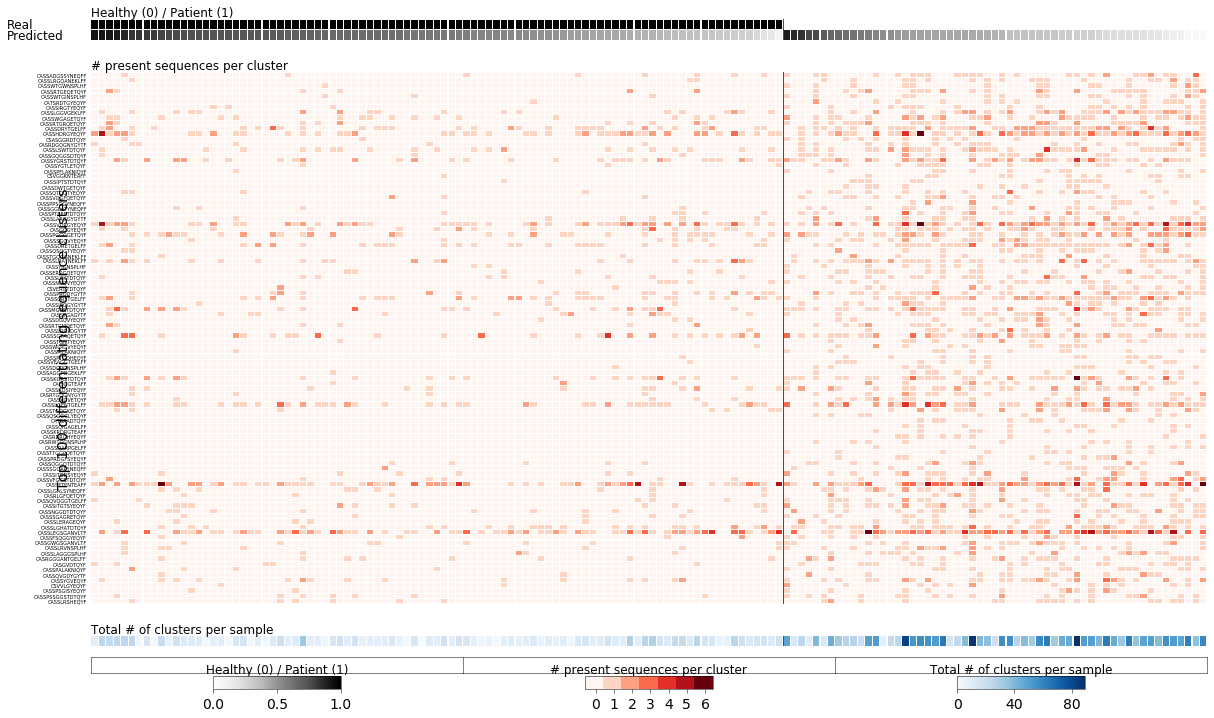

In [177]:
### C:
fig = plt.figure(figsize=(20, 12))
gs01 = gridspec.GridSpec(126, 3, wspace=0, hspace=0)

ax1=plt.Subplot(fig,gs01[:4,:]) ## isCardio heatmap
fig.add_subplot(ax1)
ax2=plt.Subplot(fig,gs01[10:110,:]) ## clusters heatmap
fig.add_subplot(ax2)
ax3=plt.Subplot(fig,gs01[116:118,:]) ## clustersummary heatmap
fig.add_subplot(ax3)

ax4=plt.Subplot(fig,gs01[120:,0]) ## isCardio colorbar
fig.add_subplot(ax4)
ax5=plt.Subplot(fig,gs01[120:,1]) ## cluaters colorbar
fig.add_subplot(ax5)
ax6=plt.Subplot(fig,gs01[120:,2]) ## cluaters sum colorbar
fig.add_subplot(ax6)

ax1,ax2,ax3,ax4,ax5,ax6,cluster_list = fig3C_topClusters_heatmap(ax_heatmap1 = ax1, ax_heatmap2 = ax2, ax_heatmap3 = ax3,
                          ax_colorbar1 = ax4, ax_colorbar2 = ax5, ax_colorbar3 = ax6)

plt.show()



### plot 3C inside figure 3:

In [178]:
plt.show()

the function remove_spines was copied to generalFiguresFunctions.py

    mean_healthy  sem_healthy  mean_patients  sem_patients      p_MW
2       7.478261     0.080781       7.543043      0.078305  0.224351
4       1.359565     0.022001       1.247826      0.023600  0.001059
6       0.445217     0.013815       0.367391      0.010815  0.000372
8       0.166087     0.007568       0.115652      0.004809  0.000007
10      0.067391     0.004082       0.054783      0.002369  0.004217
reading cluster matrix...
binarizing matrix...
('sampleByClusterDF_binary_balanced shape: ', (150, 536761))
generating distance matrix...
generating condensed distance matrix using jaccard
top similar pairs:
          dist sample1 sample2
763   0.798177    BD27   BD124
814   0.800100    BD27  BD1083
769   0.813734    BD27   BD106
4510  0.815050   BD124   BD106
4555  0.816545   BD124  BD1083
776   0.819343    BD27   BD150
856   0.819679    BD27   BD984
9136  0.823167  BD1083   BD984
5224  0.824113   BD106  BD1083
5959  0.824178   BD150  BD1083
generating kde plot
generating kde pl

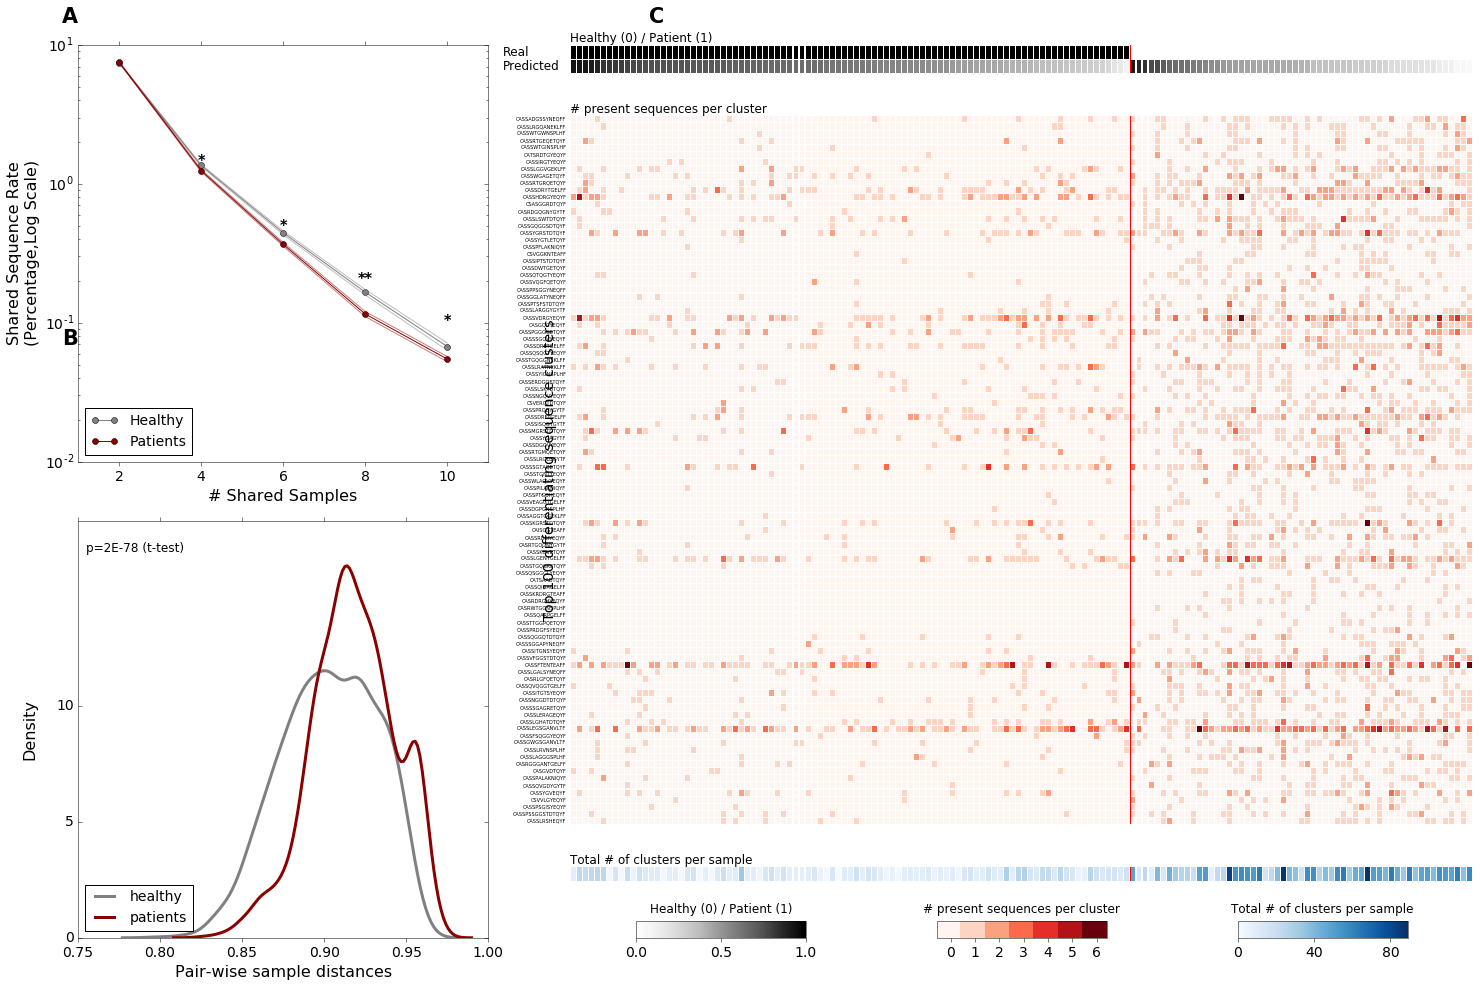

Finished figure 3!!


In [179]:
fig = plt.figure(figsize=(25, 16))
gs0 = gridspec.GridSpec(6, 6, wspace=0.5, hspace=0.6)

#add sub-figure letters and remove spines:
ax = plt.gca()
plt.text(0,1.02,'A',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
plt.text(0,0.66,'B',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
plt.text(0.42,1.02,'C',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')

remove_spines(removeFigBorders=True)

### A:
ax1 = plt.Subplot(fig, gs0[:3, :2])
fig.add_subplot(ax1)
ax1,df=compare_sharing_rate(ax1,useExistingDF=True)

## B:
ax2 = plt.Subplot(fig, gs0[3:, :2])
fig.add_subplot(ax2)
ax2=fig3B_plot_PCoA_balancedMales_new(ax2)


# # divide subplot into sub-subplots
# gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2:, :2],wspace=0, hspace=0.2)
# ax21=plt.Subplot(fig,gs00[:2,:]) ## isCardio heatmap
# fig.add_subplot(ax21)
# ax22=plt.Subplot(fig,gs00[2,:]) ## clusters heatmap
# fig.add_subplot(ax22)

# ax_PCoA=ax21
# ax_PCoA_dist=ax22

# ax_PCoA,ax_PCoA_dist=fig3B_plot_PCoA_balancedMales(ax_PCoA,ax_PCoA_dist)



### C:
# ax3 = plt.Subplot(fig, gs0[:, 2:])
# fig.add_subplot(ax3)

# divide subplot into sub-subplots
gs01 = gridspec.GridSpecFromSubplotSpec(126, 3, subplot_spec=gs0[:, 2:],wspace=0, hspace=0)
ax4=plt.Subplot(fig,gs01[:4,:]) ## isCardio heatmap
fig.add_subplot(ax4)
ax5=plt.Subplot(fig,gs01[10:110,:]) ## clusters heatmap
fig.add_subplot(ax5)
ax6=plt.Subplot(fig,gs01[116:118,:]) ## clustersummary heatmap
fig.add_subplot(ax6)

ax7=plt.Subplot(fig,gs01[120:,0]) ## isCardio colorbar
fig.add_subplot(ax7)
ax8=plt.Subplot(fig,gs01[120:,1]) ## clusters colorbar
fig.add_subplot(ax8)
ax9=plt.Subplot(fig,gs01[120:,2]) ## clusters sum colorbar
fig.add_subplot(ax9)

ax4,ax5,ax6,ax7,ax8,ax9,cluster_list = fig3C_topClusters_heatmap(ax_heatmap1 = ax4, ax_heatmap2 = ax5, ax_heatmap3 = ax6,
                          ax_colorbar1 = ax7, ax_colorbar2 = ax8, ax_colorbar3 = ax9)

# for ax in [ax1,ax21,ax22]:
#     ax=remove_spines(ax=ax)
    
for ax in [ax4,ax6,ax7,ax8,ax9]:
    ax=remove_spines(ax=ax,removeFigBorders=True)
    
ax5=remove_spines(ax5,removeFigBorders=True,removeTicks=True,removeTicklabels=False)

# ## save figure:
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.5)
plt.show()
fig.savefig(FIG2_DIR + 'figure2_ver2_%s.png' % cdate, dpi=300)

print 'Finished figure 3!!'






#  copy all necessary functions to .py files! generate .py file for figure 2 and execute!!!!!

# old stuff

## 3C: Fisher manhattan plot

### generate manahhatn plot

In [ ]:
# get fisher results:
Fisher_res=pd.read_excel(CLUSTER_DATA_DIR+'Fisher_MW_comparisons/\
Fisher_MW_results_PNP530_balancedAge_males_prodClusRed_Cardio126_balancedAge_males_prodClusRed_percShared01_percTooMany085.xlsx')

Fisher_res.head()

In [ ]:
# calculate -log10
Fisher_res_small=Fisher_res[['cluster_head','p_MW']]
Fisher_res_small['-log10p']=-np.log10(Fisher_res_small['p_MW'])
Fisher_res_small=Fisher_res_small.set_index('cluster_head').sort_index()
Fisher_res_small.head()

In [ ]:
-np.log10(0.0000012)

In [ ]:
# sort by ab and plot
fig,ax=plt.subplots()



ax.scatter(range(Fisher_res_small.shape[0]),Fisher_res_small['-log10p'],color='black',alpha=0.4,s=3)
ax.set_xlim(0,Fisher_res_small.shape[0])
ax.set_ylim(0,Fisher_res_small['-log10p'].max()+1)
# ax.plot(range(Fisher_res_small.shape[0]),-np.log10(0.0000012),color='black', linewidth=3,linestyle='--')
ax.axhline(y=-np.log10(0.0000012))
plt.show()

### cluster the clusters by similarity (correlation matrix)
use healthy people data

In [ ]:
sampleByClusterDF_small

In [ ]:
sampleByClusterDF_small.corr()

In [ ]:
sampleByClusterDF=pd.read_pickle('/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/\
sharingAnalysis/seqClusters_allProd_maxdist1/sampleByClusterDF_cohortfiltering005-085perc_dropped.dat')
sampleByClusterDF_small=sampleByClusterDF.iloc[:10,:10]
g=sns.clustermap(sampleByClusterDF_small.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(13, 13))

plt.show()

### plot again manhattan plot, this time the clusters are orderd by similarity clusters